##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [ ]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `hw_16831` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/hw_16831'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/hw_16831'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [ ]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg > /dev/null 2>&1

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [92.1 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,161 kB]
Get:

In [ ]:
#@title clone homework repo
#@markdown Note that this is the same codebase from homework 1,
#@markdown so you may need to move your old `hw_16831`
#@markdown folder in order to clone the repo again.

#@markdown **Don't delete your old work though!**
#@markdown You will need it for this assignment.

%cd $SYM_PATH
!git clone https://github.com/cmuroboticsdrl/16831_hw_F22.git
%cd 16831_hw_F22/hw2
%pip install -r requirements.txt
%pip install -e .

/content/gdrive/My Drive/hw_16831
fatal: destination path '16831_hw_F22' already exists and is not an empty directory.
/content/gdrive/My Drive/hw_16831/16831_hw_F22
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 6), reused 27 (delta 4), pack-reused 0
Unpacking objects: 100% (29/29), done.
From https://github.com/cmuroboticsdrl/16831_hw_F22
   f699064..3e11e84  main       -> origin/main
Updating f699064..3e11e84
Checking out files: 100% (20/20), done.
Fast-forward
 hw1/rob831/infrastructure/rl_trainer.py           |   9 +-
 hw2/README.md                                     |  24 +++
 hw2/requirements.txt                              |  10 +
 hw2/rob831/__init__.py                            |   0
 hw2/rob831/agents/__init__.py                     |   3 +
 hw2/rob831/agents/base_agent.py                   |  16 ++
 hw2/rob831/agents/pg_agent.py                     | 192 +++++++

In [ ]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

/usr/local/lib/python3.7/dist-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym

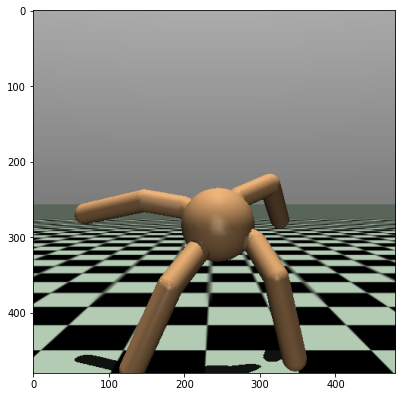

In [ ]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
import gnwrapper

env = gnwrapper.LoopAnimation(gym.make('Ant-v4'))

observation = env.reset()
for i in range(100):
    obs, rew, term, _ = env.step(env.action_space.sample())
    env.render()
    if term:
      break

env.display()
env.close()

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`hw_16831/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

## Run Policy Gradients

In [ ]:
#@title imports

import os
import time

from rob831.infrastructure.rl_trainer import RL_Trainer
from rob831.agents.pg_agent import PGAgent

%load_ext autoreload
%autoreload 2

In [ ]:
#@title runtime arguments

class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  def __contains__(self, key):
    return hasattr(self, key)

  env_name = 'CartPole-v0' #@param
  exp_name = 'q1_sb_rtg_na' #@param

  #@markdown main parameters of interest
  n_iter = 100 #@param {type: "integer"}

  ## PDF will tell you how to set ep_len
  ## and discount for each environment
  ep_len = 200 #@param {type: "integer"}
  discount = 0.95 #@param {type: "number"}

  reward_to_go = True #@param {type: "boolean"}
  nn_baseline = False #@param {type: "boolean"}
  gae_lambda = None #@param {type: "number"}
  dont_standardize_advantages = False #@param {type: "boolean"}

  #@markdown batches and steps
  batch_size = 1000 #@param {type: "integer"}
  eval_batch_size = 400 #@param {type: "integer"}

  num_agent_train_steps_per_iter = 1 #@param {type: "integer"}
  learning_rate =  5e-3 #@param {type: "number"}

  #@markdown MLP parameters
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}

  #@markdown system
  save_params = False #@param {type: "boolean"}
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}
    
  action_noise_std = 0 #@param {type: "number"}

  #@markdown logging
  ## default is to not log video so
  ## that logs are small enough to be
  ## uploaded to gradscope
  video_log_freq =  -1#@param {type: "integer"}
  scalar_log_freq =  1#@param {type: "integer"}


args = Args()

## ensure compatibility with hw1 code
args['train_batch_size'] = args['batch_size']

if args['video_log_freq'] > 0:
  import warnings
  warnings.warn(
      '''\nLogging videos will make eventfiles too'''
      '''\nlarge for the autograder. Set video_log_freq = -1'''
      '''\nfor the runs you intend to submit.''')

In [ ]:
#@title create directory for logging

data_path = '''/content/hw_16831/16831_hw_F22/hw2/data'''

if not (os.path.exists(data_path)):
    os.makedirs(data_path)

logdir = args.exp_name + '_' + args.env_name + '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [ ]:
## define policy gradient trainer

class PG_Trainer(object):

    def __init__(self, params):

        #####################
        ## SET AGENT PARAMS
        #####################

        computation_graph_args = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            }

        estimate_advantage_args = {
            'gamma': params['discount'],
            'standardize_advantages': not(params['dont_standardize_advantages']),
            'reward_to_go': params['reward_to_go'],
            'nn_baseline': params['nn_baseline'],
            'gae_lambda': params['gae_lambda'],
        }

        train_args = {
            'num_agent_train_steps_per_iter': params['num_agent_train_steps_per_iter'],
        }

        agent_params = {**computation_graph_args, **estimate_advantage_args, **train_args}

        self.params = params
        self.params['agent_class'] = PGAgent
        self.params['agent_params'] = agent_params
        self.params['batch_size_initial'] = self.params['batch_size']

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params)

    def run_training_loop(self):

        self.rl_trainer.run_training_loop(
            self.params['n_iter'],
            collect_policy = self.rl_trainer.agent.actor,
            eval_policy = self.rl_trainer.agent.actor,
            )

In [ ]:
## run training

print(args.logdir)
trainer = PG_Trainer(args)
trainer.run_training_loop()

/content/hw_16831/16831_hw_F22/hw2/data/q1_sb_rtg_na_CartPole-v0_22-09-2022_13-49-37
########################
logging outputs to  /content/hw_16831/16831_hw_F22/hw2/data/q1_sb_rtg_na_CartPole-v0_22-09-2022_13-49-37
########################
Using GPU id 0


/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  f"The environment {id} is out of date. You should consider "
/usr/local/lib/python3.7/dist-packages/gym/core.py:330: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in futu



********** Iteration 0 ************


NotImplementedError: ignored

In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

## requires tensorflow==2.3.0
%load_ext tensorboard
%tensorboard --logdir /content/hw_16831/16831_hw_F22/hw2/data